<center><h1>Spotify Genre Classification</h1></center>
<hr>

## References

> [Pandas: UTF-8 Encoding Not Working - user encoding cp1252](https://stackoverflow.com/questions/49561407/utf-8-error-when-opening-csv-file-in-pandas-on-mac)<br>
> [Pandas: Rename the portion of columns - df.rename](https://stackoverflow.com/questions/36342689/changing-part-of-a-column-name-in-pandas)<br>
> [Matplotlib: Draw Piechar - pyplot.piechar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)<br>
> [Matplotlib: Title Text Size](https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib)<br>
> [Matplotlib: 3D Scatter Plot](http://localhost:8888/notebooks/Top%20Spotify%20Songs%20from%202010%202019%20by%20Year/Spotify%20Genre%20Classification.ipynb#5.1)<br>
> [sci-kit learn: Stratify for train-test-split](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn)<br>
> [sci-kit learn: train-test-split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)<br>
> [sci-kit learn: One Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)<br>
> [sci-kit learn: PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)<br>

## Table of Contents <a id="top"></a>
1. [Task Objectives](#1)
2. [Data Description](#2)
3. [Data Cleaning](#3)
    1. [Import Library](#3.1)
    2. [Load Data](#3.2)
    3. [Basic Information](#3.3)
4. [Exploratory Data Analysis](#4)
    1. [Boxplot Columns](#4.1)
    2. [Genre Distribution](#4.2)
    3. [Correlation of Features](#4.3)
    4. [PCA](#4.4)
5. [Data Modeling](#5)
    1. [Making Dataset](#5.1)
    2. [Statistical Modeling](#5.2)
    3. [Grid Search for Best Parameter](#5.3)
    4. [Ensemble Models](#5.4)
6. [Evaluation](#6)
7. [Conclusion](#7)

<hr>

# 1. Task Objectives <a id="1"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Can we classify the Genre of the songs?**<br><br>
> Spofity Dataset shows various data about a single song, such as liveness, acousticness, and son on. We could think that this aspects maybe become features for genre classification at a glance. For this task, let's see whether we could classify the genre of the song by the features given by spofity

# 2. Data Description <a id="2"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **It is from Kaggle Dataset [Top Spotify Songs From 2010-2019 by Year](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)**<br><br>
> Dataset has only the most popular songs with 13 variables. Because it is not full dataset for the songs, maybe not easy to classify Genre by theses features.

<a href="https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year"><img src="./data/static/Data Description.png" alt="Data Description Capture"></a>

# 3. Data Cleaning <a id="3"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

## 3.1. Import Library <a id="3.1"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [104]:
# Numerical Data
import numpy as np

# Dataframe
import pandas as pd

# Visualization
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
pd.options.display.max_columns = 499
pd.options.display.max_rows = 499
pd.options.mode.chained_assignment = None

In [3]:
%matplotlib inline

## 3.2. Load Data <a id="3.2"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [4]:
spotify_df = pd.read_csv('./data/top10s.csv', encoding='cp1252')

In [5]:
spotify_df.to_csv('./data/top10s_utf8.csv', encoding='utf-8', index=False)

In [6]:
spotify_df = pd.read_csv('./data/top10s_utf8.csv', encoding='utf-8')

In [7]:
spotify_df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [8]:
spotify_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
spotify_df

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


## 3.3. Basic Information <a id="3.3"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Data Basic Information**<br><br>
> There are no missing values hopefully.

In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         603 non-null    int64 
 1   title      603 non-null    object
 2   artist     603 non-null    object
 3   top genre  603 non-null    object
 4   year       603 non-null    int64 
 5   bpm        603 non-null    int64 
 6   nrgy       603 non-null    int64 
 7   dnce       603 non-null    int64 
 8   dB         603 non-null    int64 
 9   live       603 non-null    int64 
 10  val        603 non-null    int64 
 11  dur        603 non-null    int64 
 12  acous      603 non-null    int64 
 13  spch       603 non-null    int64 
 14  pop        603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [10]:
spotify_df.describe(include='all')

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603,603,603,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
unique,NaN,584,184,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Here,Katy Perry,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,17,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,302.000000,NaN,NaN,NaN,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,NaN,NaN,NaN,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,NaN,NaN,NaN,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,NaN,NaN,NaN,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,NaN,NaN,NaN,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,NaN,NaN,NaN,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000


In [11]:
spotify_df.isna().sum()

id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

# 4. Exploratory Data Analysis <a id="4"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

## 4.1. Boxplot Columns <a id="4.1"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [12]:
def boxplot(dataset):
    BPM_COLUMN_INDEX = 5
    SUBPLOT_ROW = 2
    SUBPLOT_COL = 5
    FIGSIZE = (20, 20)

    columns = dataset.columns[BPM_COLUMN_INDEX:]
    targets = dataset.loc[:, columns]
    
    fig, axes = plt.subplots(SUBPLOT_ROW, SUBPLOT_COL, figsize=FIGSIZE)
    
    for idx, col in enumerate(columns.values):
        r = idx // SUBPLOT_COL
        c = idx % SUBPLOT_COL
        axes[r][c].boxplot(dataset.loc[:, col])
        axes[r][c].set_title('Boxplot on {}'.format(col))
        axes[r][c].set_xlabel('{}'.format(col))

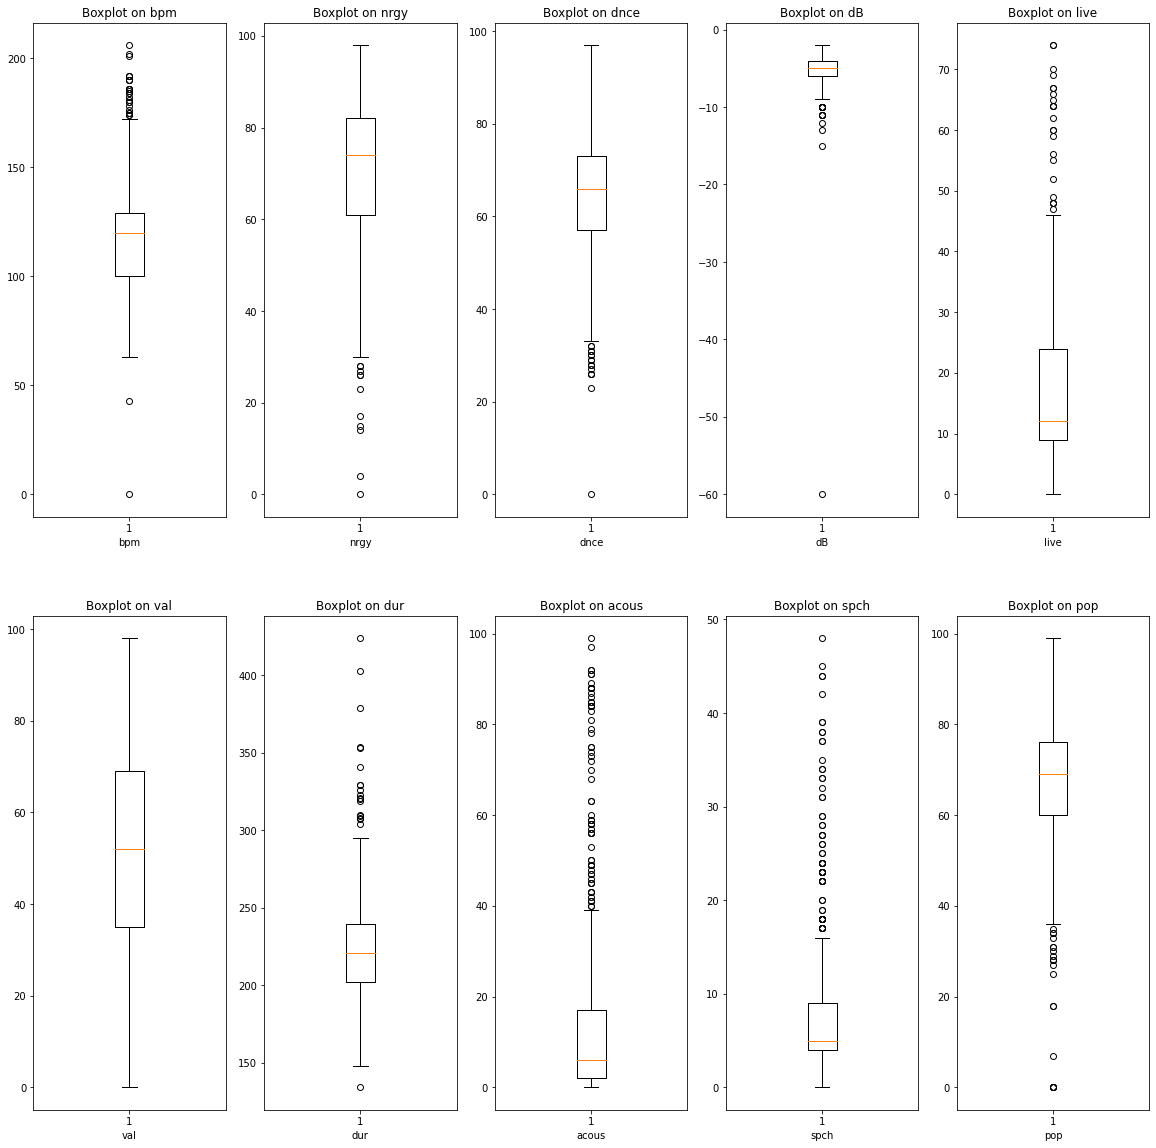

In [13]:
boxplot(spotify_df)

## 4.2. Genre Distribution<a id="4.2"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Genre is toooo skewed**<br><br>
> Because the data is biased to pops(xxx-pop), Genre Classification may not be discriminative.

In [14]:
def piechart(dataset):
    FIGSIZE = (30, 30)
    THRESHOLD = 20
    DIVIER = 50
    TEXTSIZE = 20
    
    
    genre_count = dataset.loc[:, 'top genre'].value_counts()
    values = genre_count.values
    labels = genre_count.index
    
    explode = [int(value >= THRESHOLD) / DIVIER for value in values]
        
    plt.figure(figsize=FIGSIZE)
    
    plt.pie(
        values, 
        explode=explode,
        labels=labels,
        autopct='%1.2f%%',
        textprops={'size': TEXTSIZE}
    )
    
    plt.title('Pie Char for Genre Distribution', fontsize=TEXTSIZE)
    plt.show()

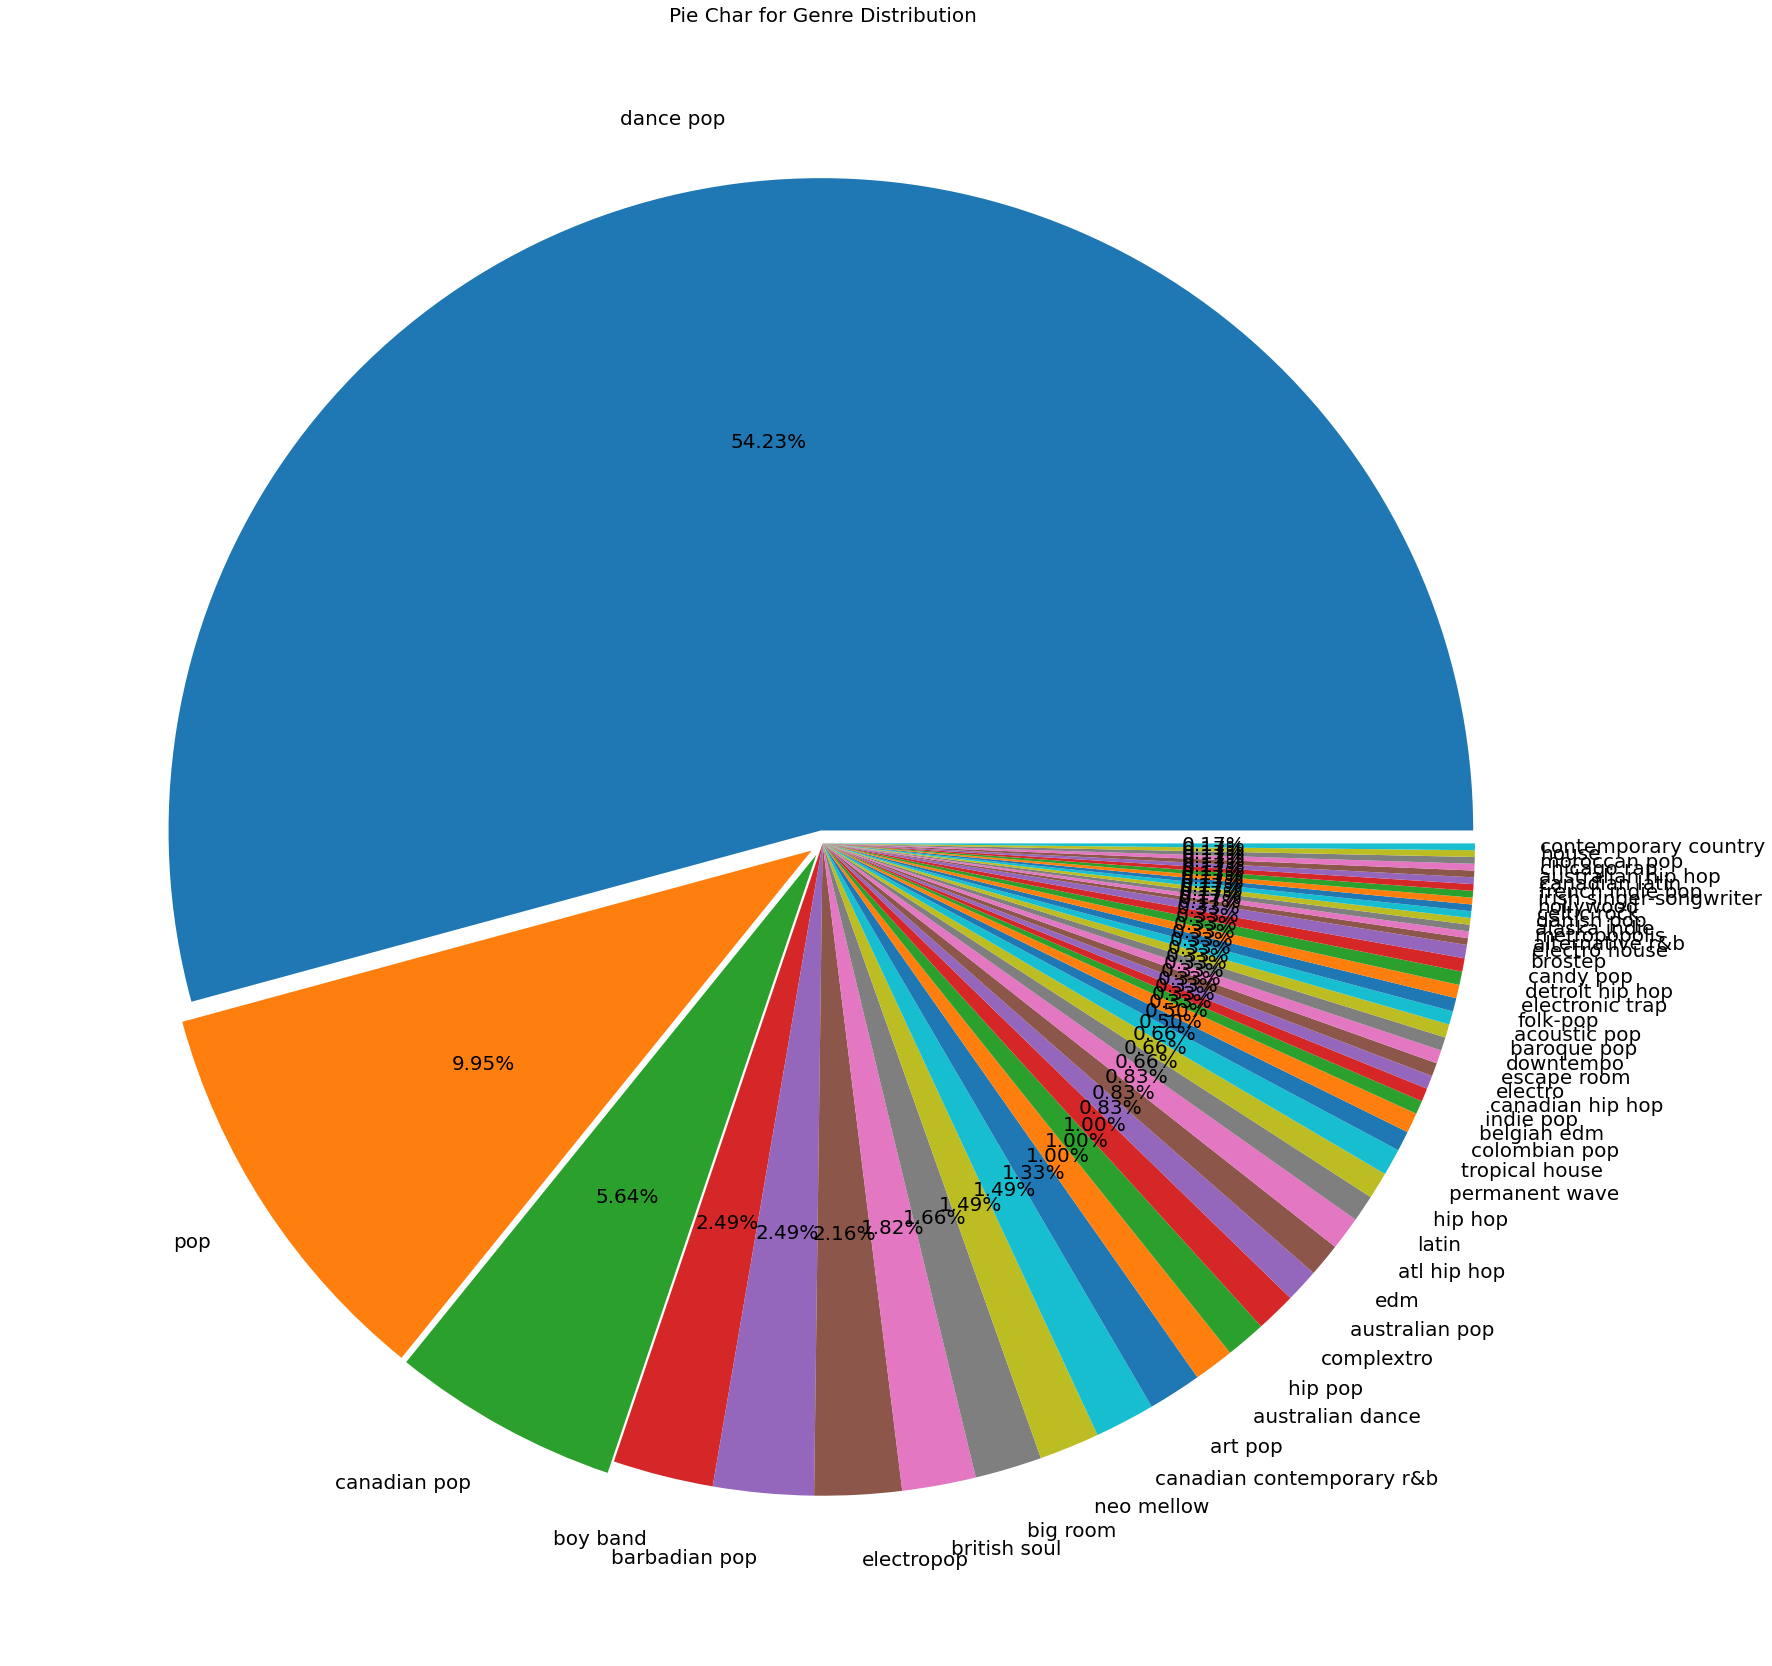

In [15]:
piechart(spotify_df)

## 4.3. Correlation of Features<a id="4.3"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Correlation between Features**<br><br>
> 1. **bpm** has not much effects on the other features<br>
> 2. Higher the **nrgy**, higher the **dB**, **val** , lower the **acous**. High Energy Level means high decibel and positive mood. However this high energy is not made by acoustic sound.<br>
> 3. **dnce** goes with **val**. Able to dance means able to be positive<br>

In [16]:
def heatmap(dataset):
    FIGSIZE = (20, 15)
    
    plt.figure(figsize=FIGSIZE)
    sns.heatmap(dataset.loc[:, 'bpm':].corr(), annot=True)
    plt.title('Heatmap for correlation between Features')
    plt.show()


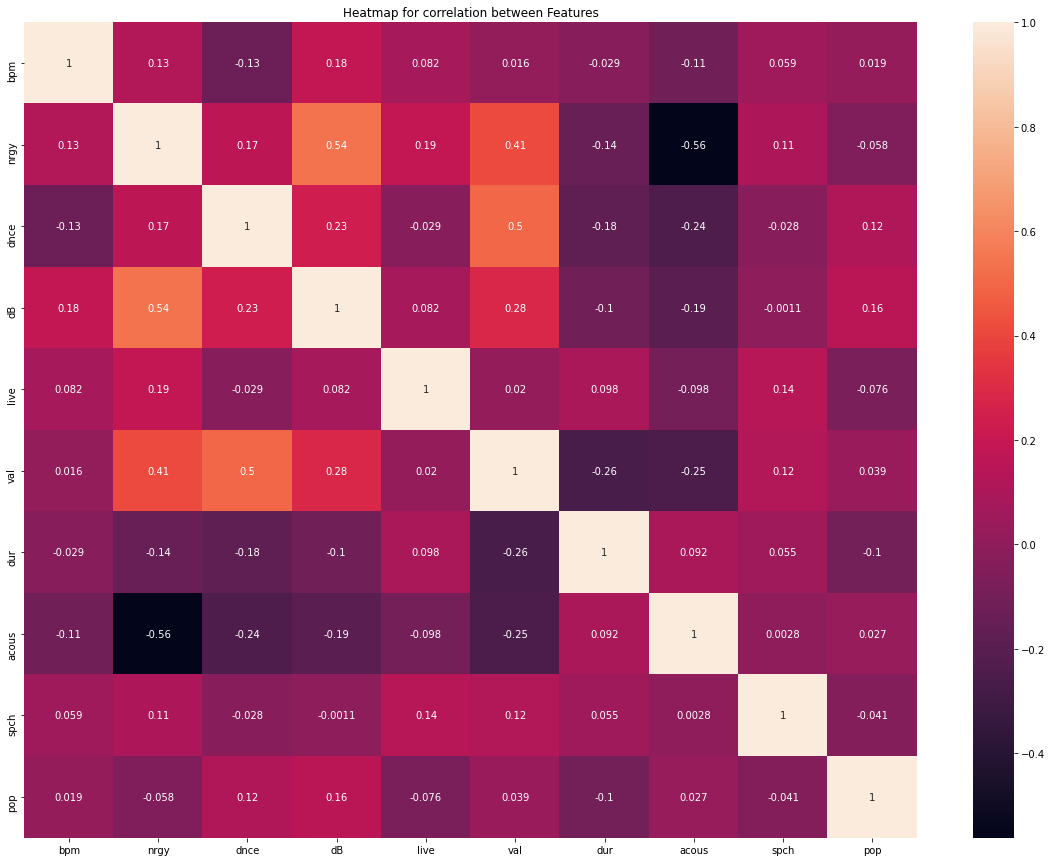

In [17]:
heatmap(spotify_df)

## 4.4. PCA<a id="4.4"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Classification might not work**<br><br>
> After PCA, not a clear discrimination

In [18]:
def pca(dataset):
    features = np.array(dataset.loc[:, 'bpm':])
    model = PCA(n_components=5, copy=False, random_state=2020)
    features_pca = model.fit_transform(features)
    
    print(model.explained_variance_ratio_)
    return model, features_pca

In [19]:
def draw_2d_pca(dataset, features):
    FIGSIZE = (20, 20)
    
    genres = dataset.loc[:, 'top genre']
    genres_count = genres.value_counts()
    
    genre2idx = {genre:idx for idx, genre in enumerate(genres_count.index)}
    
    colormap = cm.Set1.colors
    genre_color = [colormap[genre2idx[genre]] if genre2idx[genre] < 9 else 'lightgrey' for genre in genres]
        
    plt.figure(figsize=FIGSIZE)
    plt.scatter(features[:, 0], features[:, 1], c=genre_color)
    plt.title('2-dimension PCA Results(Top 2 components)')
    plt.xlabel('First PCA Component')
    plt.ylabel('Second PCA COmponent')
    plt.plot()

In [20]:
def draw_3d_pca(dataset, features):
    FIGSIZE = (10, 10)
    
    genres = dataset.loc[:, 'top genre']
    genres_count = genres.value_counts()
    
    genre2idx = {genre:idx for idx, genre in enumerate(genres_count.index)}
    
    colormap = cm.Set1.colors
    genre_color = [colormap[genre2idx[genre]] if genre2idx[genre] < 9 else 'lightgrey' for genre in genres]

    fig = plt.figure(figsize=FIGSIZE)
        
    ax = Axes3D(fig)
    ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=genre_color, s=20)
    
    plt.title('3-dimension PCA Results(Top 3 components)')
    plt.show()

In [21]:
model, features = pca(spotify_df)
print(features.shape)

[0.3539705  0.19343463 0.16710145 0.09819453 0.06031873]
(603, 5)


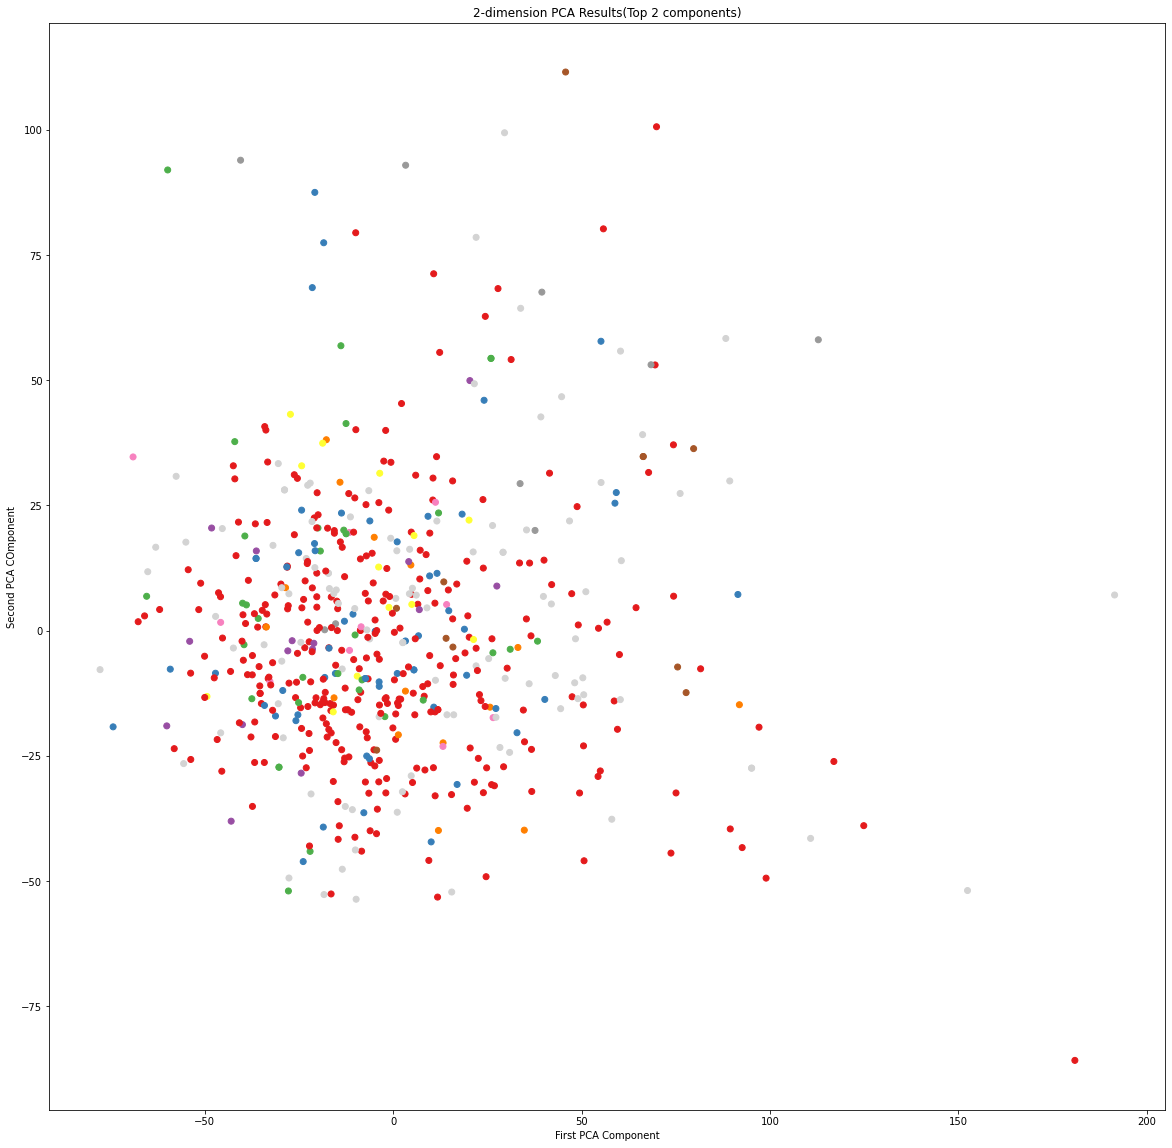

In [22]:
draw_2d_pca(spotify_df, features)

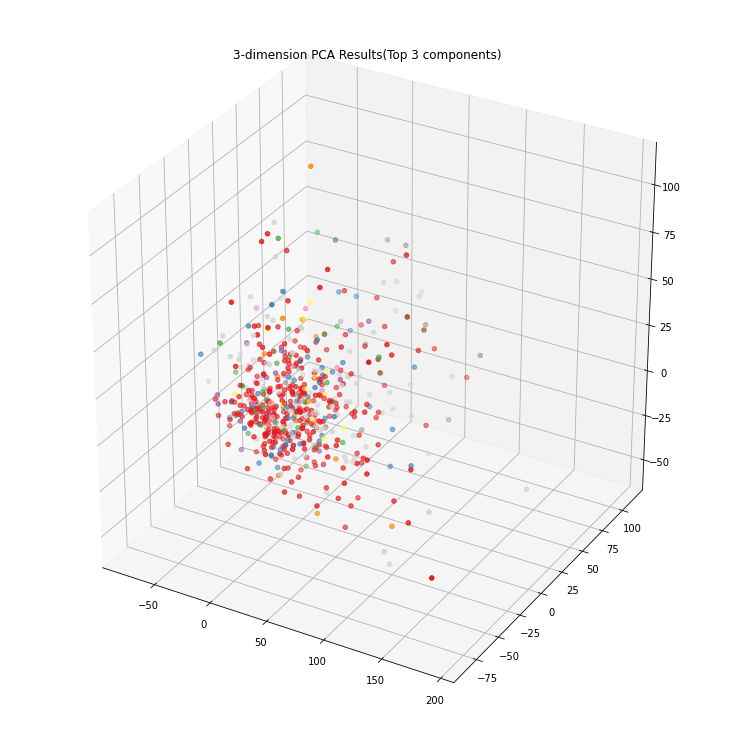

In [23]:
draw_3d_pca(spotify_df, features)

# 5. Data Modeling <a id="5"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Use Statistical Model**<br><br>
> Because dataset is not too large, statistical modeling would be fine. Also the data is biased to pop, therefore only classify top 5 genres. <br>
> <br>
> ***Because of data inbalance, most of the data is classified to label 0 which is dance pop***

## 5.1. Making Dataset <a id="5.1"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [24]:
def make_dataset(dataset):
    features = np.array(dataset.loc[:, 'bpm':])
    labels = dataset.loc[:, 'top genre']
    
    label2idx = {label:idx for idx, label in enumerate(labels.value_counts().index[:5])}
    label2idx['other'] = 5

    labels_encoded = labels.apply(lambda label: label2idx[label] if label in label2idx.keys() else 5)  
    labels_encoded = np.array(labels_encoded)
    labels_encoded = np.reshape(labels_encoded, (-1, 1))
    return label2idx, features, labels_encoded

In [25]:
label2idx, features, labels = make_dataset(spotify_df)

In [26]:
label2idx

{'dance pop': 0,
 'pop': 1,
 'canadian pop': 2,
 'boy band': 3,
 'barbadian pop': 4,
 'other': 5}

In [27]:
features.shape

(603, 10)

In [28]:
labels.shape

(603, 1)

In [29]:
def split_train_and_test(features, labels):
    train_features, test_features, train_labels, test_labels = train_test_split(
        features,
        labels,
        test_size=0.1,
        stratify=labels
    )
    
    return train_features, test_features, train_labels, test_labels

In [30]:
train_features, test_features, train_labels, test_labels = split_train_and_test(features, labels)

In [31]:
train_features.shape

(542, 10)

In [32]:
test_features.shape

(61, 10)

In [33]:
train_labels.shape

(542, 1)

In [34]:
test_labels.shape

(61, 1)

In [35]:
def to_onehot(labels, categories='auto'):
    encoder = OneHotEncoder(categories=categories)
    labels = encoder.fit_transform(labels)
    return encoder, labels

In [36]:
encoder, train_labels_onehot = to_onehot(train_labels)

In [37]:
_, test_labels_onehot = to_onehot(test_labels, encoder.categories_)

In [38]:
train_labels_onehot.shape

(542, 6)

In [39]:
test_labels_onehot.shape

(61, 6)

## 5.2. Statistical Modeling <a id="5.2"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Not Good Model**<br><br>
> Basically Model Performance is not good. About 50% for all models. Even there is a possibility of overfit

In [40]:
def plot_metrics(scores, model):
    epochs = range(1, len(scores['train_score']) + 1)
        
    plt.figure(figsize=(12, 9))
    
    plt.plot(epochs, scores['train_score'], 'b', label='Train')
    plt.plot(epochs, scores['test_score'], 'r', label='Validation')
    
    plt.legend()
    
    plt.title('{:} History of Score: Test Score Avarage: {:.4f}'.format(model, np.mean(scores['test_score'])))
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    
    plt.show()

In [41]:
def svm(features, labels):
    model = SVC(random_state=2020)
    scores = cross_validate(model, features, labels, cv=10, verbose=1, return_train_score=True)
    return model, scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


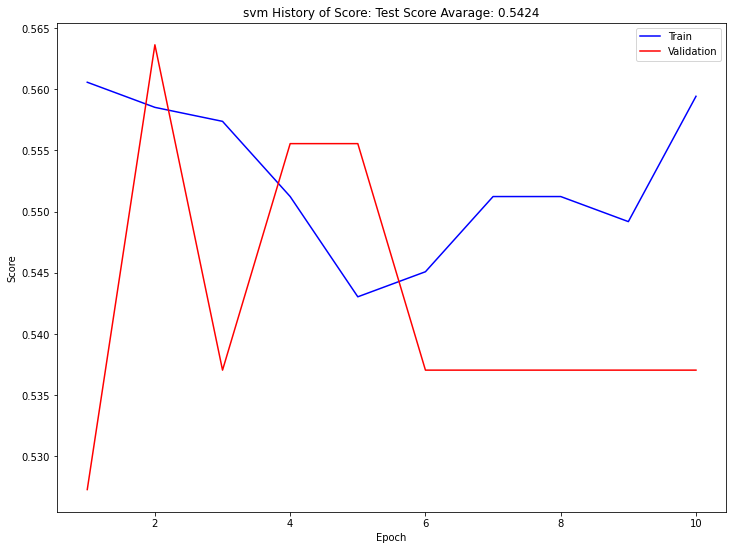

In [42]:
train_labels_1d = np.reshape(train_labels, (-1))
svm_model, svm_scores = svm(train_features, train_labels_1d)
plot_metrics(svm_scores, 'svm')

In [43]:
def decision_tree(features, labels):
    model = DecisionTreeClassifier(max_depth=3, random_state=2020)
    scores = cross_validate(model, features, labels, cv=10, verbose=1, return_train_score=True)
    return model, scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


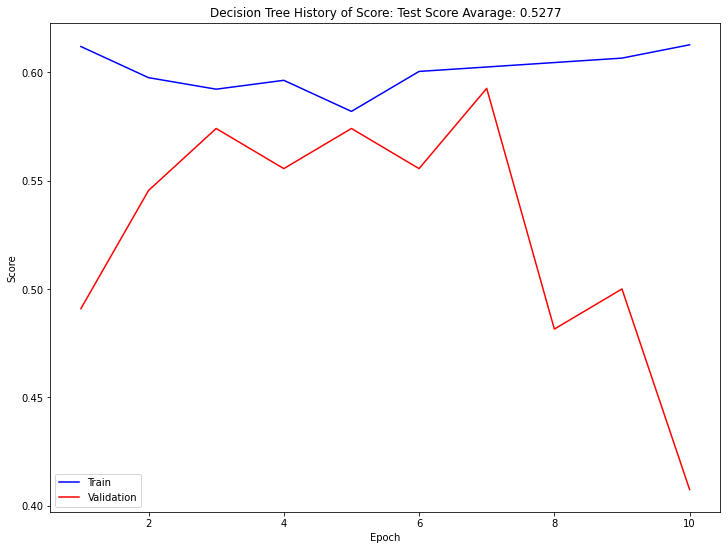

In [44]:
dt_model, dt_scores = decision_tree(train_features, train_labels)
plot_metrics(dt_scores, 'Decision Tree')

In [45]:
def extra_tree(features, labels):
    model = ExtraTreeClassifier(max_depth=3, random_state=2020)
    scores = cross_validate(model, features, labels, cv=10, verbose=1, return_train_score=True)
    return model, scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


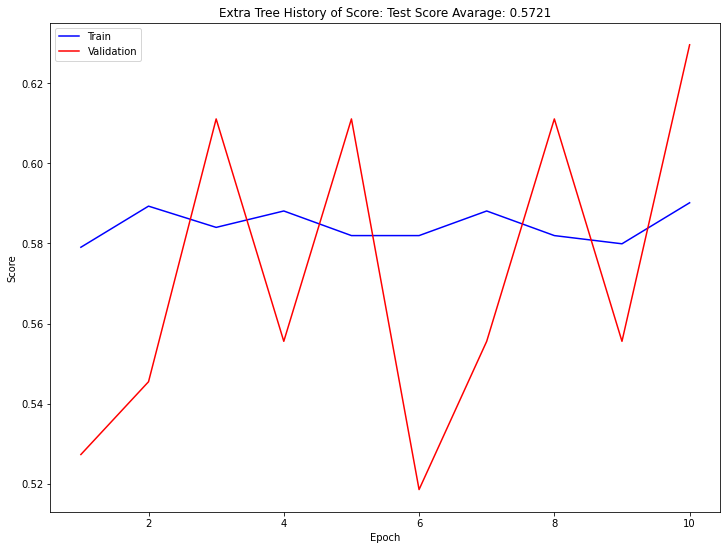

In [46]:
et_model, et_scores = extra_tree(train_features, train_labels)
plot_metrics(et_scores, 'Extra Tree')

In [47]:
def mlp(features, labels):
    model = MLPClassifier(hidden_layer_sizes=(50,), learning_rate='invscaling', random_state=2020)
    scores = cross_validate(model, features, labels, cv=10, verbose=1, return_train_score=True)
    return model, scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)

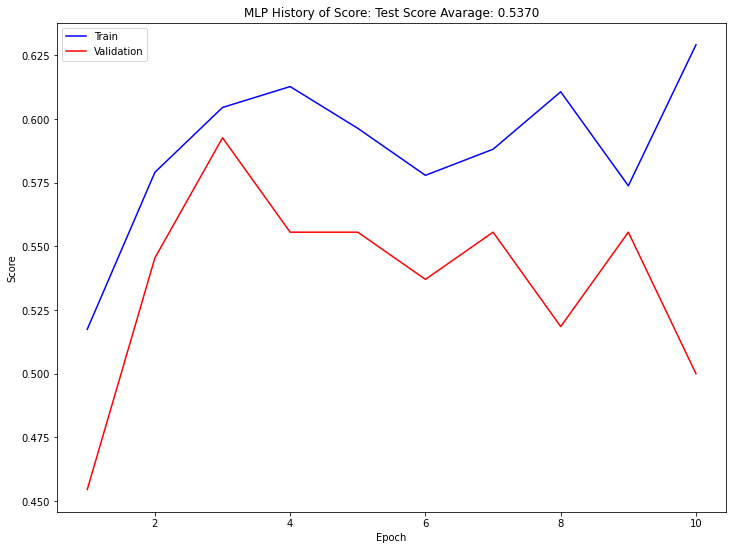

In [48]:
train_labels_1d = np.reshape(train_labels, (-1,))
mlp_model, mlp_scores = mlp(train_features, train_labels_1d)
plot_metrics(mlp_scores, 'MLP')

In [49]:
def knn(features, labels):
    model = KNeighborsClassifier(n_neighbors=3)
    scores = cross_validate(model, features, labels, cv=10, verbose=1, return_train_score=True)
    return model, scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


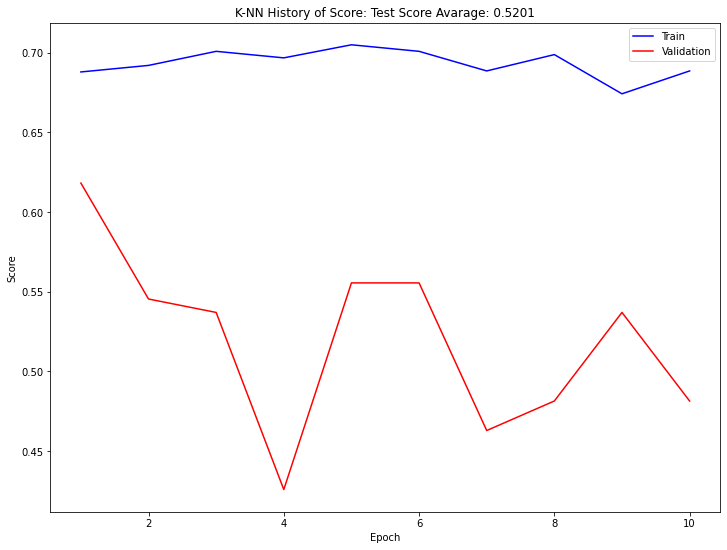

In [50]:
train_labels_1d = np.reshape(train_labels, (-1, ))
knn_model, knn_scores = knn(train_features, train_labels_1d)
plot_metrics(knn_scores, 'K-NN')

## 5.3. Grid Search for Best Parameter <a id="5.3"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [51]:
def grid_search_svc(features, labels):
    parameters = {
        'C': (0.25, 0.5, 0.75, 1.0),
        'kernel': ('linear', 'rbf')
    }
    model = SVC(random_state=2020)
    clf = GridSearchCV(model, parameters, verbose=2, return_train_score=True)
    clf.fit(features, labels)
    
    return clf

In [52]:
train_labels_1d = np.reshape(train_labels, (-1, ))
svc_clf = grid_search_svc(train_features, train_labels_1d)
svc_clf

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.25, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=0.25, kernel=linear, total=   0.4s
[CV] C=0.25, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................ C=0.25, kernel=linear, total=   0.5s
[CV] C=0.25, kernel=linear ...........................................
[CV] ............................ C=0.25, kernel=linear, total=   0.4s
[CV] C=0.25, kernel=linear ...........................................
[CV] ............................ C=0.25, kernel=linear, total=   0.3s
[CV] C=0.25, kernel=linear ...........................................
[CV] ............................ C=0.25, kernel=linear, total=   0.5s
[CV] C=0.25, kernel=rbf ..............................................
[CV] ............................... C=0.25, kernel=rbf, total=   0.0s
[CV] C=0.25, kernel=rbf ..............................................
[CV] ............................... C=0.25, kernel=rbf, total=   0.0s
[CV] C=0.25, kernel=rbf ..............................................
[CV] ............................... C=0.25, kernel=rbf, total=   0.0s
[CV] C=0.25, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   19.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=2020, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.25, 0.5, 0.75, 1.0),
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [53]:
svc_clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': 2020,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=2020, shrinking=True,
     tol=0.001, verbose=False),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'C': (0.25, 0.5, 0.75, 1.0), 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': None,
 'verbose': 2}

In [54]:
print('Test Score {}'.format(svc_clf.score(test_features, test_labels)))

Test Score 0.5737704918032787


In [55]:
def grid_search_knn(features, labels):
    parameters = {
        'n_neighbors': (3, 5, 7, 9),
        'p': (1, 2)
    }
    model = KNeighborsClassifier()
    clf = GridSearchCV(model, parameters, verbose=2, return_train_score=True)
    clf.fit(features, labels)
    
    return clf

In [56]:
train_labels_1d = np.reshape(train_labels, (-1, ))
knn_clf = grid_search_knn(train_features, train_labels_1d)
knn_clf

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=3, p=1 ..............................................
[CV] ............................... n_neighbors=3, p=1, total=   0.0s
[CV] n_neighbors=3, p=1 ..............................................
[CV] ............................... n_neighbors=3, p=1, total=   0.0s
[CV] n_neighbors=3, p=1 ..............................................
[CV] ............................... n_neighbors=3, p=1, total=   0.0s
[CV] n_neighbors=3, p=1 ..............................................
[CV] ............................... n_neighbors=3, p=1, total=   0.0s
[CV] n_neighbors=3, p=1 ..............................................
[CV] ............................... n_neighbors=3, p=1, total=   0.0s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ............................... n_neighbors=3, p=2, total=   0.0s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... n_neighbors=3, p=2, total=   0.0s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ............................... n_neighbors=3, p=2, total=   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ............................... n_neighbors=5, p=1, total=   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ............................... n_neighbors=5, p=1, total=   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ............................... n_neighbors=5, p=1, total=   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ............................... n_neighbors=5, p=1, total=   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ............................... n_neighbors=5, p=1, total=   0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9), 'p': (1, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [57]:
knn_clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'n_neighbors': (3, 5, 7, 9), 'p': (1, 2)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': None,
 'verbose': 2}

In [58]:
print('Test Score {}'.format(knn_clf.score(test_features, test_labels)))

Test Score 0.5737704918032787


In [59]:
def grid_search_dt(features, labels):
    parameters = {
        'criterion': ('gini', 'entropy'),
        'max_depth': (3, 5, 7),
        'max_features': ('sqrt', 'log2')
    }
    model = DecisionTreeClassifier(random_state=2020)
    clf = GridSearchCV(model, parameters, verbose=2, return_train_score=True)
    clf.fit(features, labels)
    
    return clf

In [60]:
dt_clf = grid_search_dt(train_features, train_labels)
dt_clf

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=3, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=3, max_features=sqrt, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=3, max_features=sqrt, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=3, max_features=sqrt, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=3, max_features=sqrt, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=3, max_features=sqrt, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2 ..................
[CV] ... criterion=gini, max_depth=3, max_features=log2, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2 ..................
[CV] ... criteri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2020,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                

In [61]:
dt_clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__presort': 'deprecated',
 'estimator__random_state': 2020,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=2020, splitter='best'),
 'iid': 'deprecated'

In [62]:
print('Test Score {}'.format(dt_clf.score(test_features, test_labels)))

Test Score 0.5081967213114754


## 5.4. Ensemble Models <a id="5.4"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [71]:
def ensemble_model(features, labels):
    svc = SVC(C=1.0, kernel='rbf', random_state=2020)
    knn = KNeighborsClassifier(n_neighbors=5, p=2)
    dt = DecisionTreeClassifier()    
    
    estimators = [
        ('svc', svc),
        ('knn', knn),
        ('dt', dt)
    ]
    
    ensemble_clf = VotingClassifier(estimators, voting='hard')
    ensemble_clf.fit(features, labels)
    return ensemble_clf

In [72]:
train_labels = np.reshape(train_labels, (-1, ))
ensemble_clf = ensemble_model(train_features, train_labels)
ensemble_clf

VotingClassifier(estimators=[('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=2020,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_param...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
   

In [74]:
print('Ensemble Score: {}'.format(ensemble_clf.score(test_features, test_labels)))

Ensemble Score: 0.4918032786885246


In [75]:
ensemble_clf.predict(test_features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 6. Evaluation <a id="6"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [154]:
def get_confusion_matrix(model, features, labels, label2idx):
    genre = [genre for genre, _ in label2idx.items()]
    
    fig, axes = plt.subplots(2, 1, figsize=(9, 9))
    plot_confusion_matrix(
        model, features, labels, 
        display_labels=genre, ax=axes[0], xticks_rotation=45)
    plot_confusion_matrix(
        model, features, labels, 
        normalize='all', display_labels=genre, ax=axes[1], xticks_rotation=45)
    plt.plot()

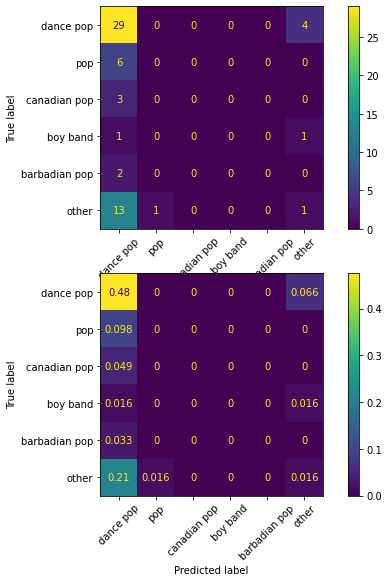

In [155]:
get_confusion_matrix(ensemble_clf, test_features, test_labels, label2idx)

# 7. Conclusion <a id="7"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Genre Classification based on the features of Spotify is failed** <br>
> <br>
> 1. Inbalance in data. So many dance pop genre (more than 50%)<br>
> 2. Other genre is similar to pop, such as pop, canadian pop, barbadian pop<br>
>
> **What if unsupervised learning?. First group by the similar trait based on the trait and see the genre or songs**